# Trabalho Prático

Disciplina: DAS-410058 - Aprendizagem de Máquina

Equipe:  Eduardo Otte Hülse, Guilherme Cornelli Souza, Ígor Yamamoto e Lucas Peruzzo
                
Assunto: Aprendizado Indutivo

Data: 13/09/2018

---

## Referências

Segue uma lista de referências utilizadas neste trabalho:
1. http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/webkb-data.gtar.gz
1. Quinlan JR. C4.5: Programs for Machine Learning. San Mateo: Morgan Kaufmann; 1993.
1. Breiman L, Friedman JH, Olshen RA, Stone CJ. Classification and Regression Trees. CRC Press; 1984.
1. http://scikit-learn.org/stable/modules/svm.html
1. http://scikit-learn.org/stable/modules/tree.html#classification
1. http://chrisstrelioff.ws/sandbox/2015/06/08/decision_trees_in_python_with_scikit_learn_and_pandas.html
1. https://www.crummy.com/software/BeautifulSoup/bs4/doc/

## Introdução

Este trabalho tem como objetivo implementar e experimentar a resolução de problemas com aprendizado por exemplos, em particular, em aplicações de data-mining. 

### Problema

O problema consiste em classificar páginas web de conteúdo acadêmico como sendo dos seguintes tipos:
* curso (course)
* departamento (department)
* professor (faculty)
* outro tipo (other)
* projeto (project)
* membro da faculdade (staff)
* estudante (student)

### Metodologia

O trabalho deve ser realizado tomando como base exemplos já classificados de páginas web disponíveins em [1]. A partir destes exemplos deve-se avaliar a qualidade de pelo menos duas técnicas/algoritimos de classificação. Para isso deve-se reservar alguns exemplos para avaliação.
As técnicas/algoritmos escolhidos para este trabalho são:
1. Árvores de Decisão / CART (Classification and Regression Trees)
2. SVM (Support Vector Machine) / 

As ferramentas utilizadas para este trabalho se baseam em bibliotecas da linguagem de programação python3. Além dos recursos básicos para leitura e manipulação de arquivos, já disponíveis na biblioteca padrão da linguagem, foram utilizadas outras bibliotecas. A biblioteca *Beautifulsoup4* foi utilizada na etapa de pré-processamento dos dados pois auxiliou no *parsing* dos arquivos html. Outra biblioteca utilizada neste etapa foi a biblioteca *pandas*. Na parte de treinamento e análise dos algoritmos utilizou-se a biblioteca *sckikit-learn* e seus algoritmos de aprendizado indutivo. Esta mesma biblioteca foi utilizada para analise dos resultados, além do uso do matplotlib, seaborn e graphviz para a geração dos gráficos e diagramas. O ambiente desenvolvimento dos experimentos foi o Jupyter-lab, e o ambiente computacional dos resultados apresentado neste relatório foi um Intel® Core™ i7-2620M CPU @ 2.70GHz × 4 com 16 GB de RAM.

Este relatório é dividido nas seguintes partes. Na primeira parte são descritos as técnicas/algoritmos utilizados para classificação neste trabalho. Na segunda parte é descrito o pré-processamento dos dados disponibilizados para o treinamento, além de indicar como foram gerados os conjuntos de treinamento e teste. Na última parte são apresentados os resultados da avaliação das técnicas escolhidas para aprendizado indutivo do problema de classificação de páginas acadêmicas.

## Técnicas de aprendizado indutivo

Diversas técnicas de aprendizado indutivo podem ser utilizadas para encontrar um classificador para o problema descrito neste trabalho. A seguir são apresentadas breves descrições de cada um dos métodos escolhidos neste trabalho. 

### Árvores de Decisão

Árvores de decisão é uma técnica que tem como objetivo criar um modelo de predição em que dado um conjunto de entradas, ele tenta prever o valor correto de saída. Esta é uma técnica muito utilizada em *data-mining* e por isso se enquandra bem para o problema que se pretende resolver neste trabalho.

Os algoritmos de aprendizado por árvores de decisão constroem a árvore a partir de tuplas de etiquetas de aprendizado.
A estrutura de uma árvore de decisão é composta por um nó raiz, nós internos, e nós terminais (folha). Cada nó intermediário é responsável por testar um dos atributos e rotear o fluxo de decisão para um dos nós subsequentes. Os nós terminais determinam uma decisão de classificação. O nó por onde se inicia o fluxo de decisão de um árvore é denominado nó raiz.

Existe uma série de algoritmos que implementam uma árvore de decisão. Eles se diferenciam em diversos aspectos como, o tipo de dados de entrada (*classification trees*, *regression trees*), se obtém o resultado baseando-se em uma ou diverssas árvores (*single tree*, *boosted trees*, *bootstrap aggregated*, *rotation forest*), ou então em quais métricas são utilizados na construção das árvores (*gini index*, *information gain*, *variation reduction*).

Neste trabalho é utilizado o algoritmo CART.

#### CART

O algoritmo clássico para construção de árvores de aprendizagem e que foi apresentado durante o curso de Aprendizamge de Máquinas é o ID3 (Iteractive Dichotomiser 3). A partir deste algoritmo foram desenvolvidos vários outras versões. Uma destas que vale a menção é o algoritmo C4.5 [2], um sucessor do ID3. Além das tradicionais etiquetas categóricas que já era empregadas no ID3, este algoritmo permitiu o uso de etiquetas com valores contínuos, atráves da criação dinâmica de intervalos de separação.
Outro algoritmo muito semelhante ao C4.5 é o CART (Classification and Regression Trees) [3]. Além de aceitar o tratamento de etiquetas com valores contínuos, este algoritmo suporta a classificação obtida ser um valor contínuo. Isto é possível pois o algortimo CART constroi, tanto as árvores de classificação do ID3 e do C4.5, quanto árvores de regressão a depender da natureza da variável que se esteja classificando.

Os algoritmos ID3 e C4.5 utilizam a métrica de *information gain*, ou seja o conceito de entropia da teoria da informação, como critério para estabelacer as separações de decição em cada nó da árvore.
Diferentemente, o algoritmo CART emprega como métrica o *gini index*. Este critério é uma medida da frequência com que um elemento escolhido aleatóriamente, estará etiquetado de forma incorreta, caso tenha sido etiquetado de maneira aleatória seguindo a distribuição das etiquetas do subconjunto remanecente.
O uso do critério *gini index* faz com que as árvores geradas pelo CART tenham apenas divisões binárias de decisão.

Para os casos onde a árvore produzida é de regressão a métrica de divisão utilizada pelo CART é a de *variance reduction*.


O procedimento do algoritmo de CART envolve as seguintes etapas:
* Tomando o nó raiz, calcula-se o *gini index* para os sub-nós gerados a partir de cada possível divisão (segundo cada parâmetro de entrada). Para cada divisão e feita a soma ponderada dos *gini index* e aquele que tiver o maior valor irá indicar uma divisão mais homogênea sendo assim escolhido.
* Repetir o processo de divisão para os sub-nós gerados.
* O processo encerra quando o algoritmo detecta que não há como obter mais ganhos fazendo divisões nos sub-nós restantes. Estes então ser tornam os nós terminais. Além disso outros critérios também são utilizados para a parada do algoritmo. 

## Suport Vector Machine

bla bla

## Pré-processamento de dados

Para a atividade de pré-processamento de dados foi escolhida a linguagem python3.
Inicialmente é feita a procura por todos os arquivos de exemplo disponíveis. Nesta procura cada item é etiquetado segundo sua classificação de saída, **output**, instituição de origem, **institution** e hiperlink, **file_name**.

### Leitura

In [4]:
import os
data_folder = "Trabalho_Pratico_Aprendizado_Maquina/webkb"
ROOT_FOLDER = data_folder
data = []
for output in os.listdir(ROOT_FOLDER):
    for institution in os.listdir(os.path.join(ROOT_FOLDER, output)):
        for file_name in os.listdir(os.path.join(ROOT_FOLDER, output, institution)):
            if os.path.isfile(os.path.join(ROOT_FOLDER, output, institution, file_name)):
                data.append({
                    'output': output,
                    'institution': institution,
                    'file_name': file_name
                })

data = sorted(data, key=lambda k: k['output'])


def check_data(dataset):
    if len(dataset) != 8282:
        print("Problema com os arquivos utilizados, a quantidade de arquivos deveria ser 8282, mas a quantidade encontrada foi de", len(data))
    else:
        print("Aparentemente tudo ok com os dados")


check_data(data)

Aparentemente tudo ok com os dados


### Características

A próxima etapa consiste em definir uma série de características, dentro das quais cada um dos arquivos deve ser etiquetado. Foram testadas uma série de caracteristicas durante este estudo, mas nem todas se mostraram eficientes para inferir a classificação do tipo de página web. Segue abaixo a lista de características utilizada nos experimentos, assim como uma lista de características que foram abandonadas.

Características utilizadas na classificação:
1. Presença de Headers ou Título com determinadas palavras chave
2. Presença de determinadas palavras
3. Quantidade de ocorrências de determinadas palavras

Características abandonadas:
1. Presença de emails, e links externos
2. Quantidade de emails e links externos com dominio *.edu*

Note que as palavras chave utilizadas tanto nos cabeçalhos quanto no conteúdo textual foram extraidas maunalmente sorteando exemplos aleatóriamento e observando os conteúdos das webpages. Abaixo no código, onde cada característica é extraída ten-se a lista completa das palavras utilizadas.

Para facilitar a etiquetagem de cada um dos itens segundo as características definidas, utiliza-se a biblioteca beautifulsoap4 (https://pypi.org/project/beautifulsoup4/).

In [5]:
from bs4 import BeautifulSoup


def get_file_path_from_item(item):
    return os.path.join(ROOT_FOLDER, item['output'], item['institution'], item['file_name'])


def get_soup(item):
    try:
        with open(get_file_path_from_item(item)) as f:
            soup = BeautifulSoup(f, 'html.parser')
    except:
        with open(get_file_path_from_item(item), encoding="ISO-8859-1") as f:
            soup = BeautifulSoup(f)
    return soup



Cada uma das características é definida abaixo. Por simplicidade foi utilizada a biblioteca pandas, e seus *dataframes* para armazenar as etiquetas geradas para cada característica em cada item.

In [6]:
import pandas as pd
from collections import OrderedDict
df = pd.DataFrame(data)

outputs = df.output.unique()
outputs.sort()

print("Lista com as classificações possíveis:", outputs)
df.head()

Lista com as classificações possíveis: ['course' 'department' 'faculty' 'other' 'project' 'staff' 'student']


,file_name,institution,output
0,http_^^cs.cornell.edu^Info^Courses^Current^CS4...,cornell,course
1,http_^^cs.cornell.edu^Info^Courses^Fall-95^CS4...,cornell,course
2,http_^^cs.cornell.edu^Info^Courses^Spring-96^C...,cornell,course
3,http_^^simon.cs.cornell.edu^Info^Courses^Curre...,cornell,course
4,http_^^simon.cs.cornell.edu^Info^Courses^Sprin...,cornell,course


#### Hyperlinks

In [0]:
# Contagem de Hyperlinks na página
COUNT_HYPERLINKS = ["number_weblinks_total", "number_emails_total"]

def get_emails(item):
    soup = get_soup(item)
    return [e.get("href") for e in soup.find_all('a') 
            if e.get("href") != None and e.get("href").startswith('mailto')]

def get_weblinks(item):
    soup = get_soup(item)
    return [e.get("href") for e in soup.find_all('a') 
            if e.get("href") != None and (e.get("href").find("http") > 0 or e.get("href").find("ftp") > 0)]

def number_of_hyperlinks(item):
    return len(get_weblinks(item)), len(get_emails(item))


df['number_weblinks_total'], df['number_emails_total'] = zip(*df.apply(number_of_hyperlinks, axis=1))

In [0]:
# Contém certos tipos de hyperlinks
HYPERLINK_TYPES = ["edu"]
HAS_HYPERLINKS = []
for t in HYPERLINK_TYPES:
    HAS_HYPERLINKS.extend(("has_link_"+t, "has_email_"+t))

def has_hyperlinks(item):
    weblinks = get_weblinks(item)
    emails = get_emails(item)
    has_hyperlink_type = []
    for t in HYPERLINK_TYPES:
        has_weblink = False
        has_email = False
        for w in weblinks:
            if w.find("."+t) > 0:
                has_weblink = True
                break
        for e in emails:
            if e.find("."+t) > 0:
                has_email = True
                break
        has_hyperlink_type.extend((has_weblink, has_email))
    return has_hyperlink_type

temp = list(zip(*df.apply(has_hyperlinks, axis=1)))
for idx, element in enumerate(HAS_HYPERLINKS):
    df[element] = temp[idx]
del(temp)

#### Header

In [0]:
# Headers
HEADER_TYPE = ["department", "prof", "uni", "college", "project", "people"]
HAS_HEADER = []
for t in HEADER_TYPE:
    HAS_HEADER.extend(("has_title_"+t, "has_header_"+t))


def get_titles(item):
    soup = get_soup(item)
    return [t.get_text().lower() for t in soup.find_all('title') if t != None]


def get_headers(item):
    soup = get_soup(item)
    return [h.get_text().lower() for i in range(1,5) for h in soup.find_all('h'+str(i)) if h != None]


def has_elements_in_headers(item):
    titles = get_titles(item)
    headers = get_headers(item)
    has_header_type = []
    for ht in HEADER_TYPE:
        has_title = False
        has_header = False
        for t in titles:
            if t.find(ht.lower()) > 0:
                has_title = True
                break
        for h in headers:
            if h.find(ht.lower()) > 0:
                has_header = True
                break
        has_header_type.extend((has_title, has_header))
    return has_header_type


temp = list(zip(*df.apply(has_elements_in_headers, axis=1)))
for idx, element in enumerate(HAS_HEADER):
    df[element] = temp[idx]
del(temp)

#### Texto

In [0]:
# Elementos Textuais
HAS_TEXT_ELEMENTS = ["Homework", "Lecture", "Exam", "Material", "Syllabu",\
                     "Course File", "Course Info", "Instructor", "Prereq",\
                     "credit", "grade", "Exercise", "textbook", "Topic",
                     "Department",
                     "Research", "Publication", "Teach", "talk", "Ph.D.",\
                     "Professor", "Paper", "Projects", "University",\
                     "Recent Publications", "Research Interest", "Assignment",
                     "project", "report","seminar", "group",
                     "staff", "Support",
                     "student", "resume"]

def has_text_elements(item):
    soup = get_soup(item)
    has_text_elements_list = []
    for element in HAS_TEXT_ELEMENTS:
        has_text_elements_list.append(soup.get_text().lower().find(element.lower()) >= 0)
    return has_text_elements_list

temp = list(zip(*df.apply(has_text_elements, axis=1)))
for idx, element in enumerate(HAS_TEXT_ELEMENTS):
    df[element] = temp[idx]
del(temp)



In [0]:
COUNT_TEXT_ELEMENTS = OrderedDict([("count_text_department", "department"),
                                   ("count_text_college", "college"),
                                   ("count_text_project", "project")])

def count_text_elements(item):
    soup = get_soup(item)
    count_text_elements_list = []
    for element in COUNT_TEXT_ELEMENTS.values():
        count_text_elements_list.append(soup.get_text().lower().count(element.lower()))
    return count_text_elements_list

temp = list(zip(*df.apply(count_text_elements, axis=1)))
for idx, element in enumerate(COUNT_TEXT_ELEMENTS.keys()):
    df[element] = temp[idx]
del(temp)

In [0]:
# l = '/home/eohulse/pCloudSync/DISCIPLINAS/DAS410058/trabalho_pratico/webkb/staff/wisconsin/http:^^www.cs.wisc.edu^~pdevries^pdevries.html'
# with open(l) as f:
#     soup = BeautifulSoup(f)

In [0]:
# soup.get_text()

### Dados de treinamento e teste

Finalmente deve-se dividir os exemplos em dois grupos, um contem itens que serão utilizados para treinamento e outro com itens que serão guardados para testar os resultados obtidos com os modelos. O tamanho escolhido para esses grupos foi de:
- Grupo de treinamento: 90%
- Grupo de teste: 10%

In [0]:
import random
seed = 389751212
random.seed(a=seed)

items = list(df.index)
print(items[:10])
items_count = len(items)
random.shuffle(items)
print(items[:10])
df_shuffled = df.reindex(items)

training_percentage = 20

df_training = df_shuffled[items_count // round(100/training_percentage):]
df_testing = df_shuffled[:items_count // round(100/training_percentage)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[7915, 3726, 4521, 5700, 64, 1683, 3698, 7204, 6045, 4633]


Agora deve-se conferir como ficou a amostragem do ponto de vista dos exemplos de cada grupo de classificação.

In [0]:
df_aux = pd.concat([df_training.groupby(["output"]).size(),df.groupby(["output"]).size()],axis=1)
100*df_aux[0]/df_aux[1]

output
course        79.462366
department    82.417582
faculty       78.469751
other         80.074389
project       80.952381
staff         83.211679
student       80.377818
dtype: float64

Também pode-se verificar quantos e quais etiquetas foram criadas para cada um dos exemplos.

In [0]:
print(len(df_testing.columns), list(df_testing.columns))
df_testing.head(3)

57 ['file_name', 'institution', 'output', 'number_weblinks_total', 'number_emails_total', 'has_link_edu', 'has_email_edu', 'has_title_department', 'has_header_department', 'has_title_prof', 'has_header_prof', 'has_title_uni', 'has_header_uni', 'has_title_college', 'has_header_college', 'has_title_project', 'has_header_project', 'has_title_people', 'has_header_people', 'Homework', 'Lecture', 'Exam', 'Material', 'Syllabu', 'Course File', 'Course Info', 'Instructor', 'Prereq', 'credit', 'grade', 'Exercise', 'textbook', 'Topic', 'Department', 'Research', 'Publication', 'Teach', 'talk', 'Ph.D.', 'Professor', 'Paper', 'Projects', 'University', 'Recent Publications', 'Research Interest', 'Assignment', 'project', 'report', 'seminar', 'group', 'staff', 'Support', 'student', 'resume', 'count_text_department', 'count_text_college', 'count_text_project']


,file_name,institution,output,number_weblinks_total,number_emails_total,has_link_edu,has_email_edu,has_title_department,has_header_department,has_title_prof,...,report,seminar,group,staff,Support,student,resume,count_text_department,count_text_college,count_text_project
7915,http:^^www.ics.uci.edu^~dfrost^,misc,student,0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,0,0,0
3726,http:^^www.cs.tamu.edu^research^SPI^,misc,department,0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,2,0,1
4521,http:^^www.cs.utexas.edu^users^almstrum^classe...,texas,course,0,2,False,True,False,False,False,...,False,False,False,False,False,False,False,1,0,0


## Classificação

Para o aprendizado da classificação das páginas web são utilizados dois métodos,
1. Árvore de decisão / CART
2. SVM

As bibliotecas utilizadas pelos dois métodos são:

In [0]:
from sklearn import tree, svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline
plt.style.use('dark_background')

### Treinamento Árvlore de Decisão

In [0]:
features_dt = HAS_HEADER + HAS_TEXT_ELEMENTS + list(COUNT_TEXT_ELEMENTS.keys())# + COUNT_HYPERLINKS + HAS_HYPERLINKS
output_dt = ["output"]

X_dt = df[features_dt]
Y_dt = df[output_dt]

Xtrain_dt = df_training[features_dt]
Ytrain_dt = df_training[output_dt]

DT = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=20,random_state=seed)
clf_dt = DT.fit(Xtrain_dt, Ytrain_dt)

#### Análise dos Resultados

A análise dos resultados é avaliada de duas maneiras:

Primeiramente os dados previamente definidos como dados de teste são utilizados para identificar o poder de predição do modelo obtido. Os resultados são então condensados em dois indicadores:
* Percentual geral do erro de predição dos dados de teste
* Matriz de confusão, que discrimina como foram classificados os exemplos de teste dentro de cada categoria, tanto os acertos quanto os erros.

Finalmente a performance da técnica escolhida é avaliada segundo o método de validação cruzada. Neste o estimador é testado n vezes para diferentes cortes de dados de treinamente e dados de teste. Este método de validação cruzada permite obter uma melhor avaliação do impacto da escolha dos dados de treinamento para o problema a ser resolvido. 

In [0]:
# Predição
n = -1
Xtest_dt = df_testing[features_dt].iloc[:n,:]
Ytest_dt = df_testing[output_dt].iloc[:n,:]
Ypred_dt = clf_dt.predict(Xtest_dt)

Accuracy: 68.22 % 
Confusion Matrix:


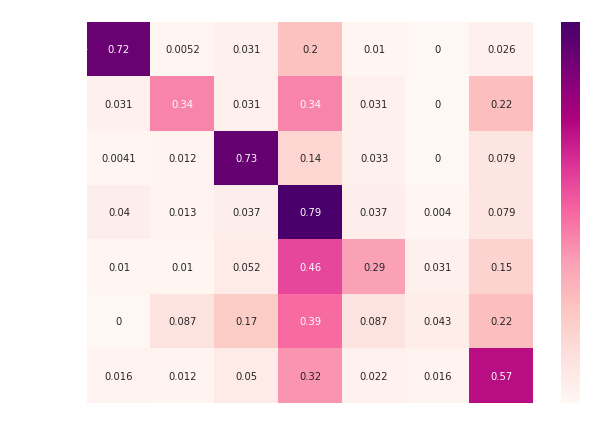

In [0]:
df_results_dt = pd.DataFrame({"real":list(Ytest_dt["output"]), "prediction":Ypred_dt})
df_results_dt["is_equal"] = df_results_dt["real"] == df_results_dt["prediction"]

### Accuracy
print("Accuracy: {0:.2f} % ".format(100*accuracy_score(Ytest_dt,Ypred_dt))) 
### Confusion Matrix
print("Confusion Matrix:")
cm_dt = confusion_matrix(df_results_dt["real"],df_results_dt["prediction"])
cm_dt = cm_dt.astype('float') / cm_dt.sum(axis=1)[:, np.newaxis]
df_cm_dt = pd.DataFrame(cm_dt, index = outputs,
                  columns = outputs)
plt.figure(figsize = (10,7))
plt.tight_layout()
ax_dt = sn.heatmap(df_cm_dt, annot=True,cmap=plt.cm.RdPu)
ax_dt.set(xlabel='Predicted label', ylabel='True label',title='Confusion Matrix')
plt.show()

In [0]:
### Cross-Validation
X_dt = df[features_dt]
Y_dt = df[output_dt]
number_of_cross_validations_dt = 10
cvs_dt = cross_validate(DT, X_dt, Y_dt, cv=number_of_cross_validations_dt)
cvs_mean_dt = {k+"_mean":v.mean() for k,v in cvs_dt.items()}
cvs_std_dt = {k+"_std":v.std() for k,v in cvs_dt.items()}
{**cvs_mean_dt, **cvs_std_dt}
print("Test Score: {test_score_mean:.4f} (+/- {test_score_std:.4f}) \nFit Time: {fit_time_mean:.4f} s (+/- {fit_time_std:.4f}) \nScore Time:  {score_time_mean:.4f} s (+/- {score_time_std:.4f}) \nTrain Score:  {train_score_mean:.4f} (+/- {train_score_std:.4f})".format(**{**cvs_mean_dt, **cvs_std_dt}))

Test Score: 0.6564 (+/- 0.0359) 
Fit Time: 0.0519 s (+/- 0.0015) 
Score Time:  0.0032 s (+/- 0.0001) 
Train Score:  0.7847 (+/- 0.0022)


In [0]:
# print("Confusion matrix as a table:")
# print(df_results_dt.groupby(["real","is_equal","prediction"]).size().groupby(level=0).apply(lambda x: 100*x/sum(x)))
# print("Consolidated confusion matrix as a table:")
# print(df_results_dt.groupby(["real","is_equal"]).count().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

In [0]:
#Plotar a árvore de decisão
import graphviz 
dot_data = tree.export_graphviz(clf_dt, out_file=None, 
                         feature_names=df[features_dt].columns,  
                         class_names=outputs,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
# graph

### Suport Vector Machine

In [0]:
features_svm = HAS_HEADER + HAS_TEXT_ELEMENTS + list(COUNT_TEXT_ELEMENTS.keys())# + COUNT_HYPERLINKS + HAS_HYPERLINKS
output_svm = ["output"]

Xtrain_svm = df_training[features_svm]
Ytrain_svm = df_training[output_svm]

SVM = svm.SVC()
clf_svm = SVM.fit(Xtrain_svm, Ytrain_svm)  

/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Análise dos Resultados

A análise dos resultados é avaliada de duas maneiras:

Primeiramente os dados previamente definidos como dados de teste são utilizados para identificar o poder de predição do modelo obtido. Os resultados são então condensados em dois indicadores:
* Percentual geral do erro de predição dos dados de teste
* Matriz de confusão, que discrimina como foram classificados os exemplos de teste dentro de cada categoria, tanto os acertos quanto os erros.

Finalmente a performance da técnica escolhida é avaliada segundo o método de validação cruzada. Neste o estimador é testado n vezes para diferentes cortes de dados de treinamente e dados de teste. Este método de validação cruzada permite obter uma melhor avaliação do impacto da escolha dos dados de treinamento para o problema a ser resolvido. 

In [0]:
# Predição
n = -1
Xtest_svm = df_testing[features_svm].iloc[:n,:]
Ytest_svm = df_testing[output_svm].iloc[:n,:]
Ypred_svm = clf_svm.predict(Xtest_svm)

Accuracy: 70.69 % 
Confusion Matrix:


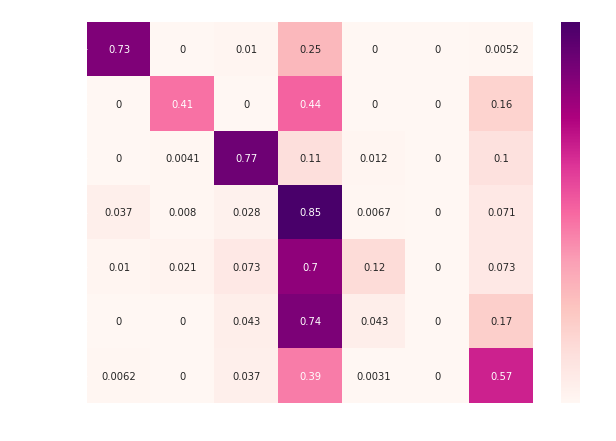

In [0]:
df_results_svm = pd.DataFrame({"real":list(Ytest_svm["output"]), "prediction":Ypred_svm})
df_results_svm["is_equal"] = df_results_svm["real"] == df_results_svm["prediction"]

### Accuracy
print("Accuracy: {0:.2f} % ".format(100*accuracy_score(Ytest_svm,Ypred_svm))) 
### Confusion Matrix
print("Confusion Matrix:")
cm_svm = confusion_matrix(df_results_svm["real"],df_results_svm["prediction"])
cm_svm = cm_svm.astype('float') / cm_svm.sum(axis=1)[:, np.newaxis]
df_cm_svm = pd.DataFrame(cm_svm, index = outputs,
                  columns = outputs)
plt.figure(figsize = (10,7))
plt.tight_layout()
ax_svm = sn.heatmap(df_cm_svm, annot=True,cmap=plt.cm.RdPu)
ax_svm.set(xlabel='Predicted label', ylabel='True label',title='Confusion Matrix')
plt.show()

In [0]:
### Cross-Validation
X_svm = df[features_svm]
Y_svm = df[output_svm]
number_of_cross_validations_svm = 10
cvs_svm = cross_validate(SVM, X_dt, Y_dt, cv=number_of_cross_validations_svm)
cvs_mean_svm = {k+"_mean":v.mean() for k,v in cvs_svm.items()}
cvs_std_svm = {k+"_std":v.std() for k,v in cvs_svm.items()}
print("Test Score: {test_score_mean:.4f} (+/- {test_score_std:.4f}) \nFit Time: {fit_time_mean:.4f} s (+/- {fit_time_std:.4f}) \nScore Time:  {score_time_mean:.4f} s (+/- {score_time_std:.4f}) \nTrain Score:  {train_score_mean:.4f} (+/- {train_score_std:.4f})".format(**{**cvs_mean_svm, **cvs_std_svm}))

/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

Test Score: 0.7014 (+/- 0.0273) 
Fit Time: 4.1125 s (+/- 0.1311) 
Score Time:  0.3861 s (+/- 0.0092) 
Train Score:  0.7245 (+/- 0.0039)


## Considerações finais

Os resultados obtidos indicam uma performance semelhante para os dois métodos utilizados, com ligeira vantagem para o modelo de predição desenvolvido com Support Vector Machine, 68% contra 70%. Contúdo o tempo para treinar o preditor de SVM é quase 100 vezes maior.

Um outro ponto que influenciaria muito no resultado e que poderia ser mais bem explorado é o pré-processamento dos dados. Uma abrodagem alternativa seria a geração de um dicionario de palavras mais comuns para cada uma das possíveis classificações. Baseando-se nessas palavras então poderia-se fazer a geração dos preditores.

# Outros testes

Daqui pra baixo eu fiz alguns outros testes, por exemplo com random forest, mas que não foram muito melhores do que o que ja tinha conseguido com svm ou arvore de decisão.

Esta parte a principio não entraria no relatorio...

In [0]:
from sklearn.ensemble import RandomForestClassifier
features_rf = HAS_HEADER + HAS_TEXT_ELEMENTS + list(COUNT_TEXT_ELEMENTS.keys())# + COUNT_HYPERLINKS + HAS_HYPERLINKS
output_rf = ["output"]

Xtrain_rf = df_training[features_rf]
Ytrain_rf = df_training[output_rf]


RF = RandomForestClassifier(n_estimators=90, criterion='entropy')
clf_rf = RF.fit(Xtrain_rf,Ytrain_rf) 

/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 69.67 % 
Confusion Matrix:


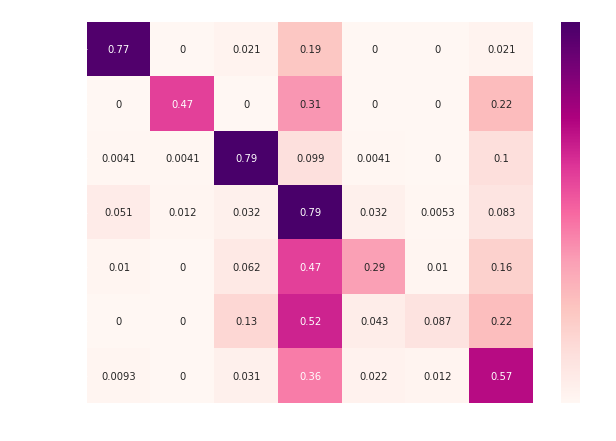

In [0]:
# Predição
n = -1
Xtest_rf = df_testing[features_rf].iloc[:n,:]
Ytest_rf = df_testing[output_rf].iloc[:n,:]
Ypred_rf = clf_rf.predict(Xtest_rf)

df_results_rf = pd.DataFrame({"real":list(Ytest_rf["output"]), "prediction":Ypred_rf})
df_results_rf["is_equal"] = df_results_rf["real"] == df_results_rf["prediction"]

### Accuracy
print("Accuracy: {0:.2f} % ".format(100*accuracy_score(Ytest_rf,Ypred_rf))) 
### Confusion Matrix
print("Confusion Matrix:")
cm_rf = confusion_matrix(df_results_rf["real"],df_results_rf["prediction"])
cm_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
df_cm_rf = pd.DataFrame(cm_rf, index = outputs,
                  columns = outputs)
plt.figure(figsize = (10,7))
plt.tight_layout()
ax_rf = sn.heatmap(df_cm_rf, annot=True,cmap=plt.cm.RdPu)
ax_rf.set(xlabel='Predicted label', ylabel='True label',title='Confusion Matrix')
plt.show()

In [0]:
### Cross-Validation
X_rf = df[features_rf]
Y_rf = df[output_rf]
number_of_cross_validations_rf = 10
cvs_rf = cross_validate(RF, X_dt, Y_dt, cv=number_of_cross_validations_rf)
cvs_mean_rf = {k+"_mean":v.mean() for k,v in cvs_rf.items()}
cvs_std_rf = {k+"_std":v.std() for k,v in cvs_rf.items()}
print("Test Score: {test_score_mean:.4f} (+/- {test_score_std:.4f}) \nFit Time: {fit_time_mean:.4f} s (+/- {fit_time_std:.4f}) \nScore Time:  {score_time_mean:.4f} s (+/- {score_time_std:.4f}) \nTrain Score:  {train_score_mean:.4f} (+/- {train_score_std:.4f})".format(**{**cvs_mean_rf, **cvs_std_rf}))

/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/eohulse/bin/miniconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/eohulse/bin/miniconda3/envs/python3/lib/pyt

Test Score: 0.6851 (+/- 0.0355) 
Fit Time: 0.7865 s (+/- 0.0238) 
Score Time:  0.0253 s (+/- 0.0006) 
Train Score:  0.9156 (+/- 0.0019)
